# Employee Churn Analysis Project

Welcome to "***Employee Churn Analysis Project***". Yes there is no typo in the headline this is **NOT a CUSTOMER but an EMPLOYEE CHURN project**. 

You will implement classification techniques and use **Scikit-Learn** to make predictions with **the Random Forest, Gradient Boosting Descent, KNN algorithms**.

At the end of the project, we will deploy our model using **Streamlit**.

# #Determines
In this project we have HR data of a company. Our goal is to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

10 attributes are as follows:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, we will use exploratory data analysis and data visualization techniques. 

Then, we'll perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. An emminent aspect of the projest is performing ***Cluster Analysis*** based on the information we obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. As a usual suspect ***K-means*** algorithm will be handy to make cluster analysis. However, we must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data we apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, we will use the ***Elbow method***.

The algorithms we'll use are;
 - ***Gradient Boosting Classifier***
 - ***K Neighbors Classifier***
 - ***Random Forest Classifier***

Finally we will deploy our model using Streamlit tool.

## 1. Exploratory Data Analysis (EDA)

In EDA we will summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### i. Importing Modules

In [4]:
# Data and Stats packages
import numpy as np
import pandas as pd

import re
import string

# ML Model packages

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.grid"] = False

import warnings
warnings.filterwarnings("ignore")

### ii. Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [5]:
empl =  pd.read_csv('HR_Dataset.csv')
empl.shape

(14999, 10)

In [6]:
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
empl.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### iii. Data Insights

In [60]:
def first_look(df, col):
    val_c = pd.DataFrame(df[col].value_counts(dropna=False))
    val_c = val_c.assign(percent=(df[col].value_counts(dropna=False, normalize=True).values)*100)
    col_info = pd.DataFrame({'Column_Name': [col],'Null_Rows': [df[col].isna().sum()], 'Column_Type': [df[col].dtypes]}, index=['col_info'])
    return val_c, col_info

In [61]:
val_c, col_info = first_look(empl, empl.columns[0]);

In [62]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,satisfaction_level,0,float64


In [63]:
val_c

,satisfaction_level,percent
0.10,358,2.386826
0.11,335,2.233482
0.74,257,1.713448
0.77,252,1.680112
0.84,247,1.646776
...,...,...
0.25,34,0.226682
0.28,31,0.206680
0.27,30,0.200013
0.12,30,0.200013


<AxesSubplot:xlabel='satisfaction_level'>

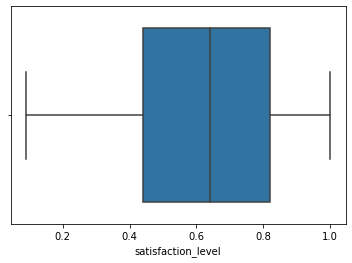

In [109]:
sns.boxplot(empl[empl.columns[0]])

As for **Satisfaction level**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [64]:
val_c, col_info = first_look(empl, empl.columns[1]);

In [65]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,last_evaluation,0,float64


In [66]:
val_c

,last_evaluation,percent
0.55,358,2.386826
0.50,353,2.353490
0.54,350,2.333489
0.51,345,2.300153
0.57,333,2.220148
...,...,...
0.39,52,0.346690
0.43,50,0.333356
0.38,50,0.333356
0.44,44,0.293353


<AxesSubplot:xlabel='last_evaluation'>

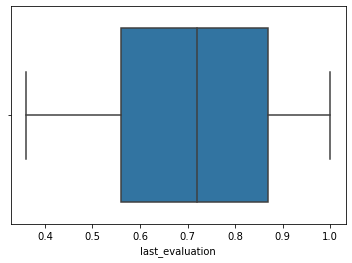

In [111]:
sns.boxplot(empl[empl.columns[1]])

As for **last_evaluation**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [67]:
val_c, col_info = first_look(empl, empl.columns[2]);

In [68]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,number_project,0,int64


In [69]:
val_c

,number_project,percent
4,4365,29.101940
3,4055,27.035136
5,2761,18.407894
2,2388,15.921061
6,1174,7.827188
7,256,1.706780


<AxesSubplot:xlabel='number_project'>

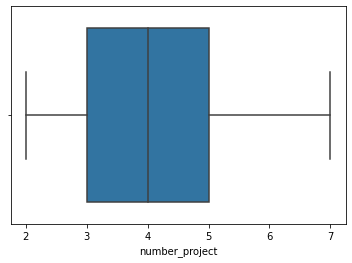

In [113]:
sns.boxplot(empl[empl.columns[2]])

As for **number_project**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [70]:
val_c, col_info = first_look(empl, empl.columns[3]);

In [71]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,average_montly_hours,0,int64


In [72]:
val_c

,average_montly_hours,percent
156,153,1.020068
135,153,1.020068
149,148,0.986732
151,147,0.980065
160,136,0.906727
...,...,...
297,7,0.046670
303,6,0.040003
288,6,0.040003
299,6,0.040003


<AxesSubplot:xlabel='average_montly_hours'>

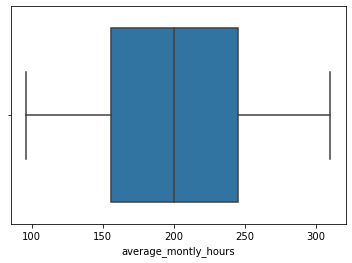

In [115]:
sns.boxplot(empl[empl.columns[3]])

As for **average_montly_hours**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [73]:
val_c, col_info = first_look(empl, empl.columns[4]);

In [74]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,time_spend_company,0,int64


In [76]:
val_c

,time_spend_company,percent
3,6443,42.956197
2,3244,21.628109
4,2557,17.047803
5,1473,9.820655
6,718,4.786986
10,214,1.426762
7,188,1.253417
8,162,1.080072


<AxesSubplot:xlabel='time_spend_company'>

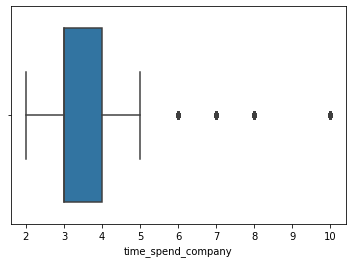

In [116]:
sns.boxplot(empl[empl.columns[4]])

As for **time_spend_company**:
  - no zero values to be treated
  - no outliers to handle (Even though box plot depicts values bigger than Q3, given the percentages working years 6,7,8 and 10 are not unexpected for a company.)
  - data type is numeric
  
we can use this column unchanged in our models.

In [77]:
val_c, col_info = first_look(empl, empl.columns[5]);

In [78]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,Work_accident,0,int64


In [79]:
val_c

,Work_accident,percent
0,12830,85.539036
1,2169,14.460964


(0.0, 100.0)

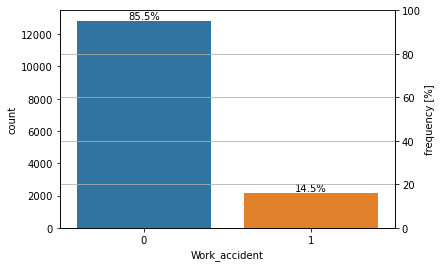

In [120]:
fig = sns.countplot(data=empl, x='Work_accident')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(empl)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

As for **Work_accident**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [80]:
val_c, col_info = first_look(empl, empl.columns[6]);

In [81]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,left,0,int64


In [82]:
val_c

,left,percent
0,11428,76.191746
1,3571,23.808254


(0.0, 100.0)

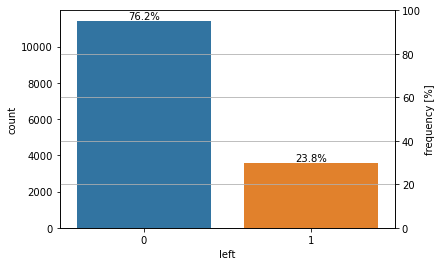

In [122]:
fig = sns.countplot(data=empl, x='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(empl)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

As for **left**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [83]:
val_c, col_info = first_look(empl, empl.columns[7]);

In [84]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,promotion_last_5years,0,int64


In [85]:
val_c

,promotion_last_5years,percent
0,14680,97.873192
1,319,2.126808


(0.0, 100.0)

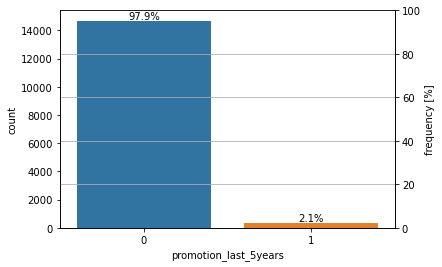

In [123]:
fig = sns.countplot(data=empl, x='promotion_last_5years')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(empl)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

As for **promotion_last_5years**:
  - no zero values to be treated
  - no outliers to handle
  - data type is numeric
  
we can use this column unchanged in our models.

In [86]:
val_c, col_info = first_look(empl, empl.columns[8]);

In [87]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,Departments,0,object


In [88]:
val_c

,Departments,percent
sales,4140,27.601840
technical,2720,18.134542
support,2229,14.860991
IT,1227,8.180545
product_mng,902,6.013734
marketing,858,5.720381
RandD,787,5.247016
accounting,767,5.113674
hr,739,4.926995
management,630,4.200280


(0.0, 100.0)

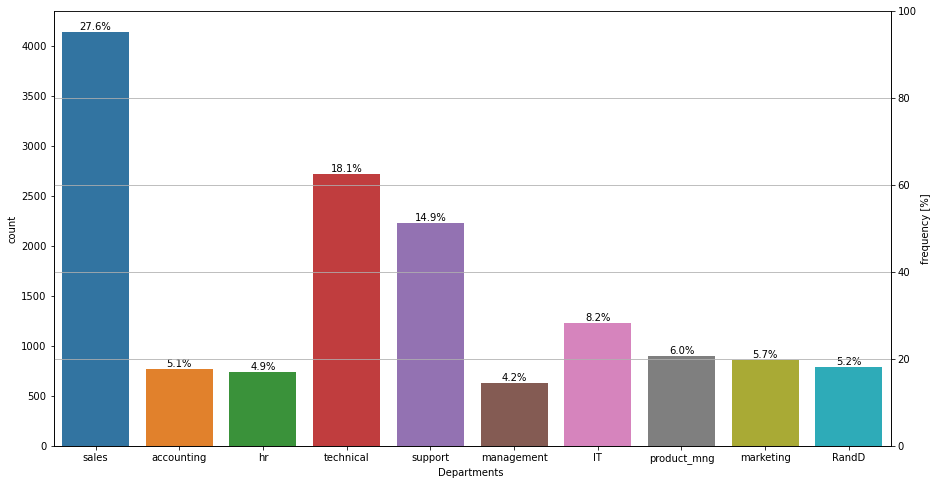

In [126]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=empl, x='Departments ')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(empl)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

As for **Departments**:
  - no zero values to be treated
  - no outliers to handle
  - data type is object
  - there is no hierarchy between departments
  
we can use this column after **get_dummies** in our models.

In [95]:
val_c, col_info = first_look(empl, empl.columns[9]);

In [96]:
col_info

,Column_Name,Null_Rows,Column_Type
col_info,salary,0,object


In [98]:
val_c

,salary,percent
low,7316,48.776585
medium,6446,42.976198
high,1237,8.247216


(0.0, 100.0)

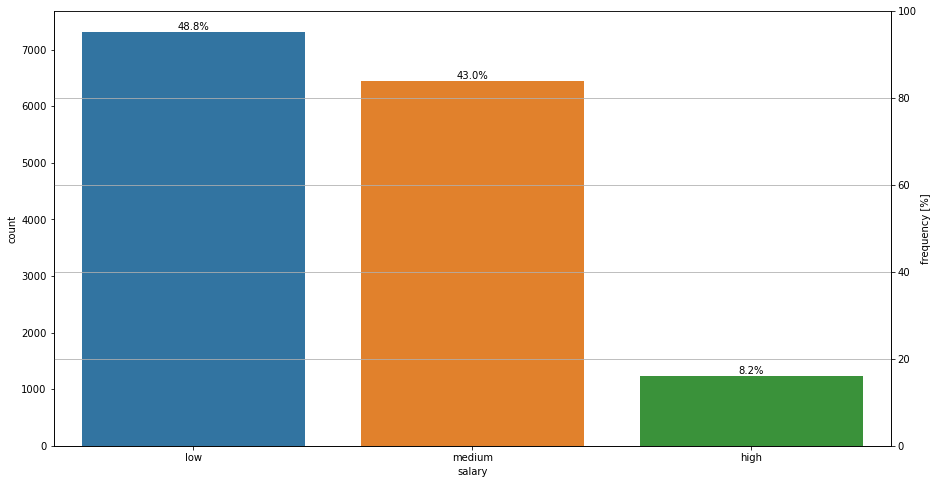

In [128]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=empl, x='salary')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(empl)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

As for **Salary**:
  - no zero values to be treated
  - no outliers to handle
  - data type is object
  - there is a hierarchy between salaries
  
we can use this column after **Label Encoding** in our models.

We are going to use **get_dummies** to convert categorical variable into dummy/indicator variables.

In [105]:
employee = pd.get_dummies(empl, columns=['Departments ', 'salary'], drop_first=True)

In [106]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


## 2. Data Visualization
We are going to use data visulisation 
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


### Subplots of Features

You can use the methods of the matplotlib.

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

### #Gradient Boosting Classifier

#### Model Building

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


#### Prediction

### #KNeighbors Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

### #Random Forest Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___